In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum/Praktikum7"

In [3]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library machine learning dari scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [12]:
import pandas as pd
import numpy as np

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/Data_Satelit.csv')

# Convert 'Mg' column to numeric, coercing errors to NaN
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')

# Fill NaN values in 'Mg' with the mean of the column
df['Mg'] = df['Mg'].fillna(df['Mg'].mean())

# Fill NaN values in 'K' with the mean of the column
df['K'] = df['K'].fillna(df['K'].mean())

print("DataFrame Info after preprocessing:")
df.info()
print("\nDataFrame Head after preprocessing:")
df.head()

DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          594 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    float64
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.60,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [6]:
print(df.isnull().sum())

No           0
Longitude    0
Lattitude    0
N            0
P            0
K            1
Ca           0
Mg           0
Fe           0
Mn           0
Cu           0
Zn           0
B            0
b12          0
b11          0
b9           0
b8a          0
b8           0
b7           0
b6           0
b5           0
b4           0
b3           0
b2           0
b1           0
Sigma_VV     0
Sigma_VH     0
plia         0
lia          0
iafe         0
gamma0_vv    0
gamma0_vh    0
beta0_vv     0
beta0_vh     0
dtype: int64


In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("✅ Bentuk X:", X.shape)
print("✅ Bentuk y:", y.shape)

✅ Bentuk X: (594, 33)
✅ Bentuk y: (594,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (475, 33)
Data uji: (119, 33)


In [15]:
# Buat model regresi linear
model = LinearRegression()

# Latih model dengan data latih
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Prediksi hasil
y_pred = model.predict(X_test)

# Tampilkan 10 hasil pertama
print("Hasil prediksi (10 data pertama):")
print(y_pred[:10])


Hasil prediksi (10 data pertama):
[0.06894644 0.08741314 0.09261605 0.08586682 0.07076759 0.06652901
 0.03069284 0.02128541 0.0674838  0.08180539]


In [19]:
# Evaluasi model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📈 HASIL EVALUASI MODEL:")
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")



📈 HASIL EVALUASI MODEL:
R² Score  : 0.9917
MAE       : 0.0015
MSE       : 0.0000
RMSE      : 0.0023


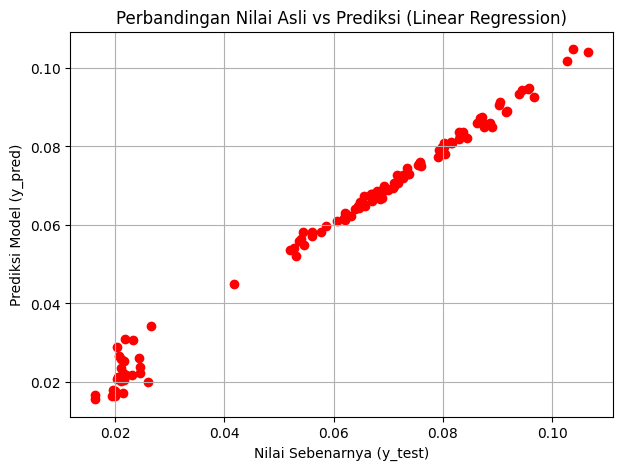

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Prediksi Model (y_pred)")
plt.title("Perbandingan Nilai Asli vs Prediksi (Linear Regression)")
plt.grid(True)
plt.show()
